In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy import stats
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from scipy.stats import linregress
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import IncrementalPCA

from scipy.interpolate import interp1d

In [2]:
SMALL_SIZE = 14
MEDIUM_SIZE = 18
BIGGER_SIZE = 18

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

NOTE. For this lab you need subsample with 5-10 random variables, at least half of them should be described with continuous random variable type. Target variable should be continuous.

In [3]:
df = pd.read_csv('datasets/data.csv')

In [4]:
df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


In [7]:
num_cols = df.columns[df.dtypes != object]
cont_cols = [col for col in num_cols if col not in ['explicit', 'mode', 'popularity', 'key']]
discrete_cols = ['explicit', 'mode']

In [8]:
#X = df[cont_cols]
y = df['popularity'] #target variable

## Step 1. 
You need to make a non-parametric estimation of PDF in form of histogram and using kernel density function for MRV (or probability law in case of discrete MRV) .

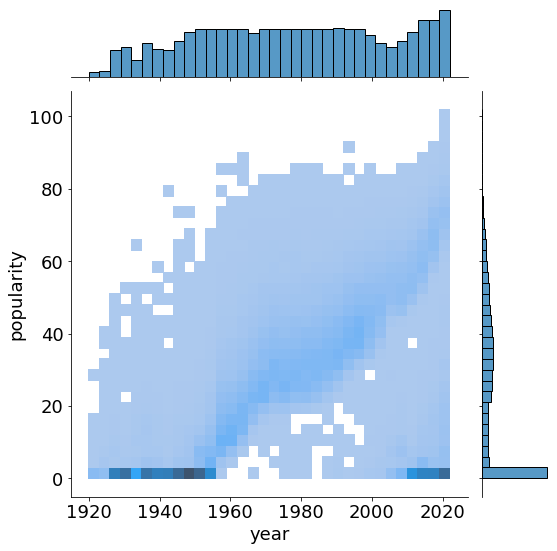

In [35]:
g = sns.JointGrid(data=df, x='year', y='popularity', height=8)
binwidth = 3
g.plot_joint(sns.histplot, binwidth=(binwidth, binwidth))
g.plot_marginals(sns.histplot, binwidth=binwidth)

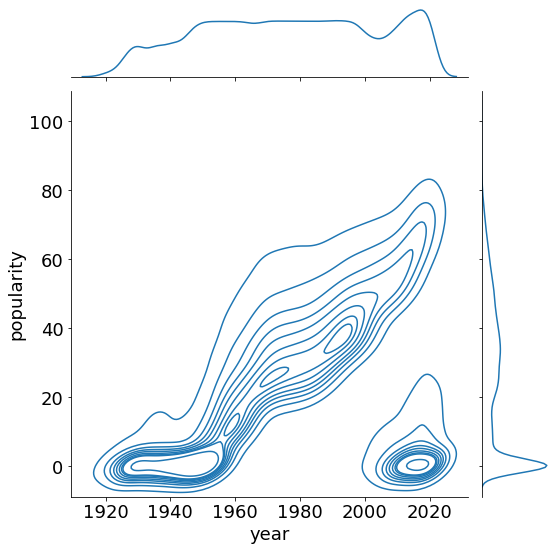

In [37]:
sns.jointplot(data=df, x='year', y='popularity', height=8, kind='kde')

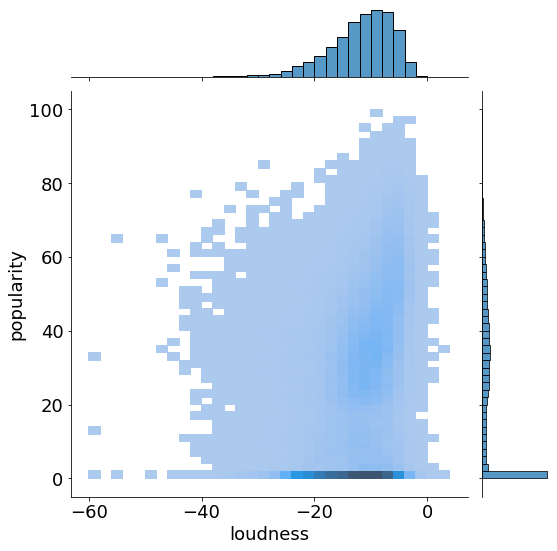

In [11]:
g = sns.JointGrid(data=df, x='loudness', y='popularity', height=8)
binwidth = 2
g.plot_joint(sns.histplot, binwidth=(binwidth, binwidth))
g.plot_marginals(sns.histplot, binwidth=binwidth)

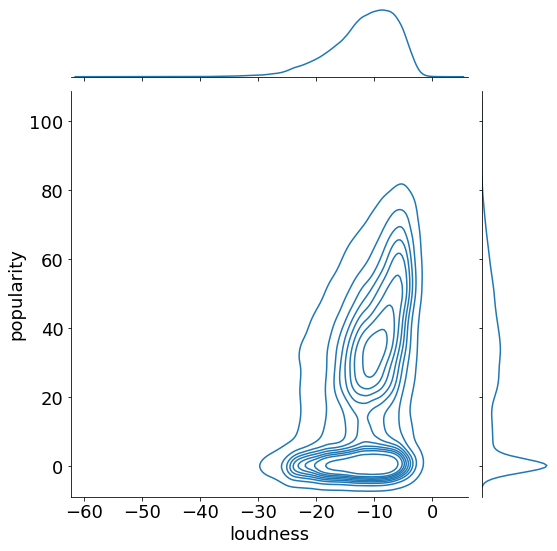

In [12]:
sns.jointplot(data=df, x='loudness', y='popularity', height=8, kind='kde')

D:\Programs\Anaconda\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later
  if sys.path[0] == '':


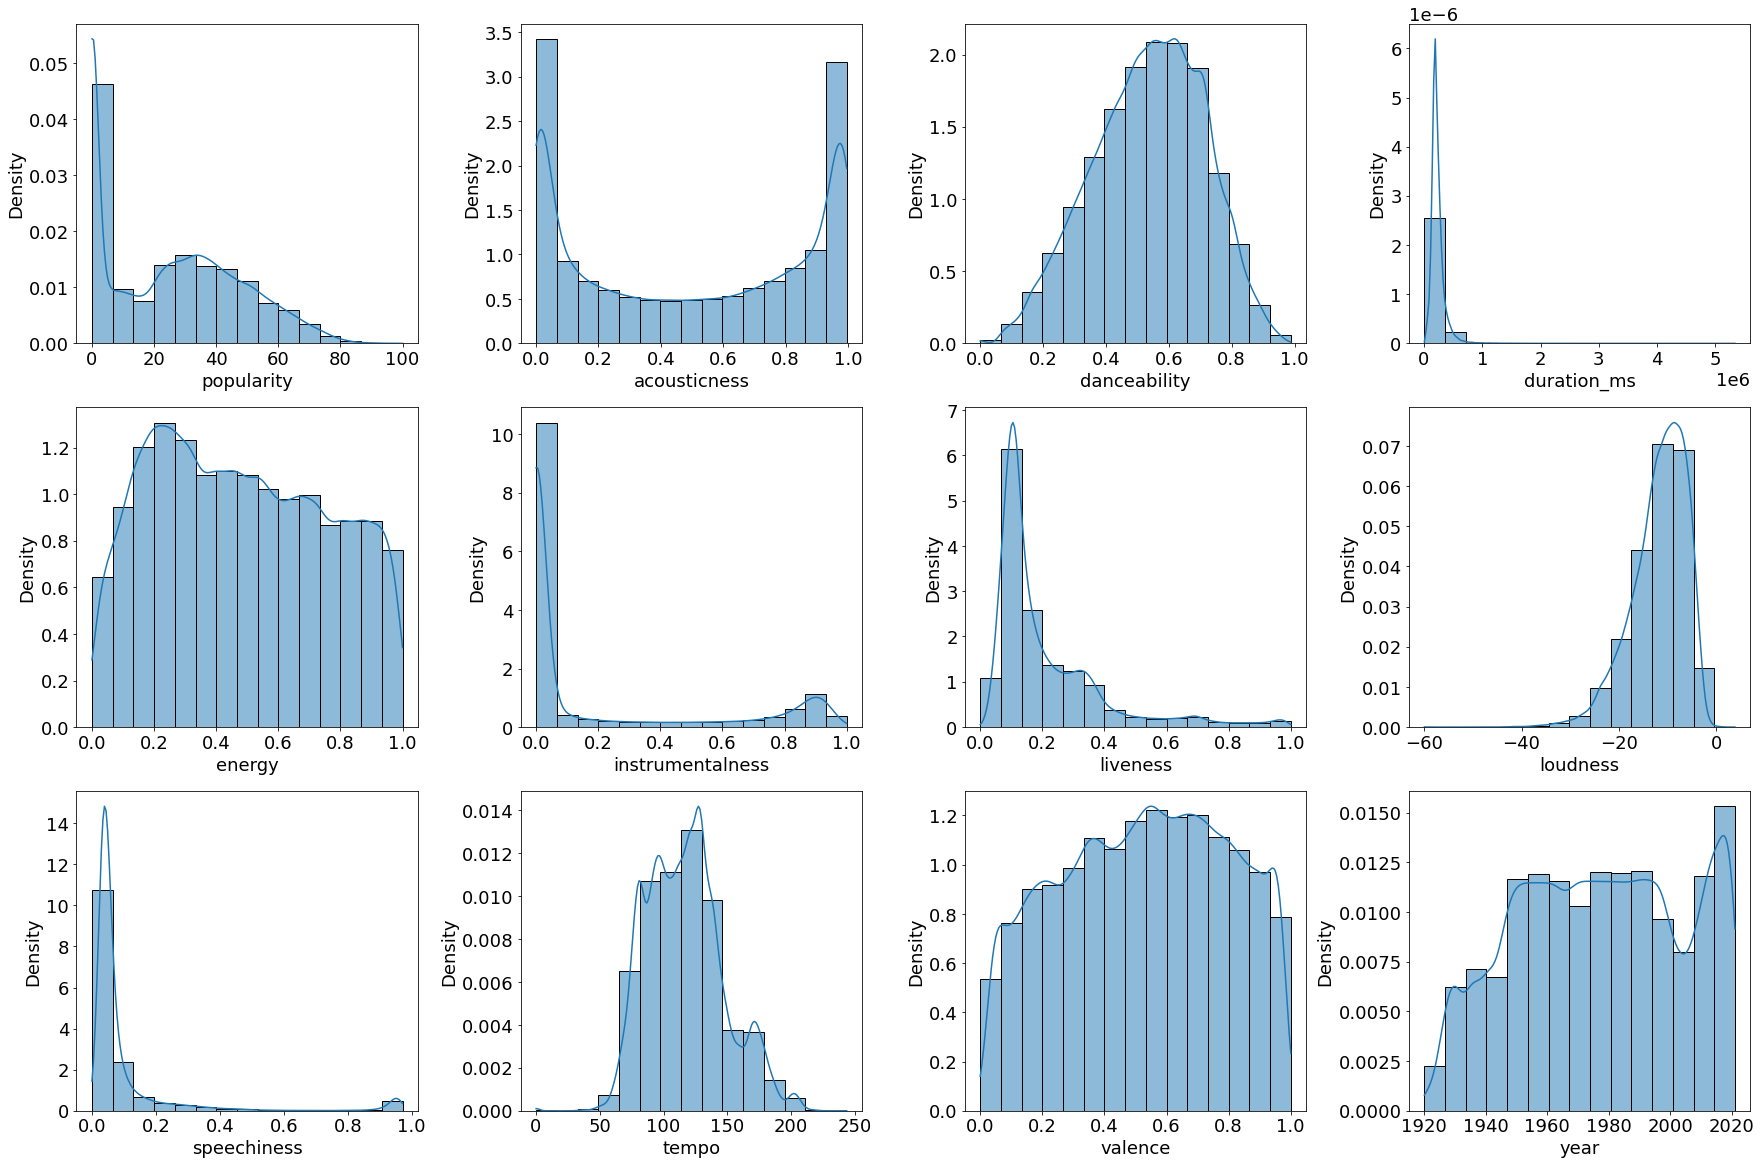

In [143]:
#continious variables
fig, axs = plt.subplots(3, 4, figsize=(30, 20))
plt.subplots_adjust(wspace=0.3)

for ax, col in zip(axs.flatten(), ['popularity'] + cont_cols):
    if col == 'key':
        bins = 8
    else:
        bins = 15
    sns.histplot(df[col], bins=bins, kde=True, stat='density', ax=ax)

plt.savefig('images/1_pdf.png', dpi=None, quality=95, transparent=False)

plt.show()

## Step 2. 
You need to make an estimation of multivariate mathematical expectation and variance.

In [7]:
df[['popularity']+cont_cols].describe().loc[['mean', 'std']].T.round(3)

,mean,std
popularity,25.693,21.873
acousticness,0.499,0.380
danceability,0.537,0.176
duration_ms,232810.032,148395.798
energy,0.483,0.273
instrumentalness,0.197,0.335
liveness,0.211,0.180
loudness,-11.751,5.692
speechiness,0.106,0.182
tempo,117.006,30.254


In [13]:
df[['popularity']+cont_cols].cov().round(2)

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,year
popularity,478.42,-3.30,0.48,8.022832e+04,1.96,-2.20,-0.31,41.98,-0.78,62.86,0.37,302.06
acousticness,-3.30,0.14,-0.02,-5.027410e+03,-0.08,0.03,-0.00,-1.18,-0.00,-2.57,-0.02,-6.21
danceability,0.48,-0.02,0.03,-2.631910e+03,0.01,-0.01,-0.00,0.25,0.01,0.03,0.02,0.75
duration_ms,80228.32,-5027.41,-2631.91,2.202131e+10,2448.80,5144.73,775.20,16715.38,-2646.19,-36733.51,-7190.06,421908.71
energy,1.96,-0.08,0.01,2.448800e+03,0.07,-0.02,0.01,1.21,-0.01,2.20,0.02,3.97
instrumentalness,-2.20,0.03,-0.01,5.144730e+03,-0.02,0.11,-0.00,-0.60,-0.01,-0.69,-0.02,-1.03
liveness,-0.31,-0.00,-0.00,7.752000e+02,0.01,-0.00,0.03,0.06,0.00,0.05,-0.00,-0.06
loudness,41.98,-1.18,0.25,1.671538e+04,1.21,-0.60,0.06,32.39,-0.22,37.52,0.46,71.24
speechiness,-0.78,-0.00,0.01,-2.646190e+03,-0.01,-0.01,0.00,-0.22,0.03,-0.18,0.00,-1.06
tempo,62.86,-2.57,0.03,-3.673351e+04,2.20,-0.69,0.05,37.52,-0.18,915.32,1.31,131.66


## Step 3. 
You need to make a non-parametric estimation of conditional distributions, mathematical expectations and variances. 

In [13]:
# let's calculate p(populatity|acousticness)

acoustic = df.acousticness

intervals = np.linspace(min(acoustic), max(acoustic), 6)

counts = []
conditions = []
for i in range(1, len(intervals)):
    a_1, a_2 = intervals[i-1], intervals[i]
    counts.append(y[np.all([a_1<=df.acousticness, df.acousticness<=a_2], axis=0)].to_numpy())
    conditions.append(np.mean([a_1, a_2]))
means = np.array([np.mean(row) for row in counts])
stds = np.array([np.std(row) for row in counts])

In [52]:
inter_pairs = [f"[{intervals[i-1]:0.3f}, {intervals[i]:.3f}]" for i in range(1, len(intervals))]
acoust_data = np.array([means.round(2), stds.round(2), inter_pairs], dtype=object).T
acoust_df = pd.DataFrame(data=acoust_data, columns=['Mean value', 'Standard deviation', 'Acousticness interval']).convert_dtypes()
acoust_df

,Mean value,Standard deviation,Acousticness interval
0,33.72,22.19,"[0.000, 0.199]"
1,34.25,20.69,"[0.199, 0.398]"
2,30.48,20.15,"[0.398, 0.598]"
3,26.67,19.2,"[0.598, 0.797]"
4,13.24,17.09,"[0.797, 0.996]"


D:\Programs\Anaconda\lib\site-packages\ipykernel_launcher.py:18: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later


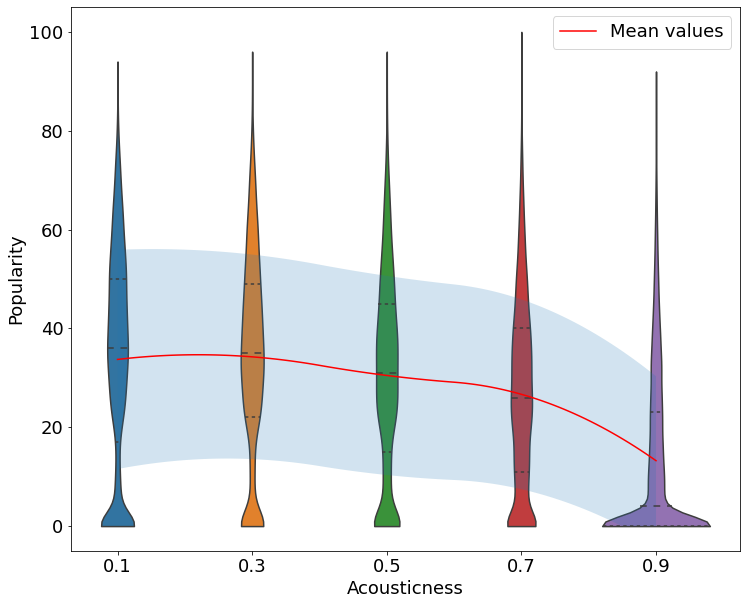

In [175]:
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
sns.violinplot(data=counts, ax=ax, inner='quartile', cut=0)
ax.set_xticklabels(np.round(conditions, 2))

x = range(len(counts))
xnew= np.linspace(0, len(counts)-1, 100)
means_s = interp1d(x, means, kind='quadratic')
means_p_std = interp1d(x, means+stds, kind='quadratic')
means_m_std = interp1d(x, means-stds, kind='quadratic')


ax.plot(xnew, means_s(xnew), color='r', label='Mean values')
ax.fill_between(xnew, y1=np.max([means_m_std(xnew), np.zeros_like(xnew)], axis=0), y2=means_p_std(xnew), alpha=0.2)
ax.legend()
ax.set_ylabel('Popularity')
ax.set_xlabel('Acousticness')

plt.savefig('images/3_cond_proba.png', dpi=None, quality=95, transparent=False)
plt.show()

In [54]:
# let's calculate p(populatity|year)

year = df.year

intervals = np.linspace(min(year), max(year), 6)

counts = []
conditions = []
for i in range(1, len(intervals)):
    a_1, a_2 = intervals[i-1], intervals[i]
    counts.append(y[np.all([a_1<=df.year, df.year<=a_2], axis=0)].to_numpy())
    conditions.append(np.mean([a_1, a_2]))
means = np.array([np.mean(row) for row in counts])
stds = np.array([np.std(row) for row in counts])

In [56]:
intervals

array([1920. , 1940.2, 1960.4, 1980.6, 2000.8, 2021. ])

In [58]:
inter_pairs = [f"[{intervals[i-1]:0.1f}, {intervals[i]:.1f}]" for i in range(1, len(intervals))]
year_data = np.array([means.round(2), stds.round(2), inter_pairs], dtype=object).T
year_df = pd.DataFrame(data=year_data, columns=['Mean value', 'Standard deviation', 'Time period']).convert_dtypes()
year_df

,Mean value,Standard deviation,Time period
0,1.76,5.1,"[1920.0, 1940.2]"
1,7.89,11.18,"[1940.2, 1960.4]"
2,31.29,12.34,"[1960.4, 1980.6]"
3,40.5,11.3,"[1980.6, 2000.8]"
4,32.1,28.74,"[2000.8, 2021.0]"


D:\Programs\Anaconda\lib\site-packages\ipykernel_launcher.py:19: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later


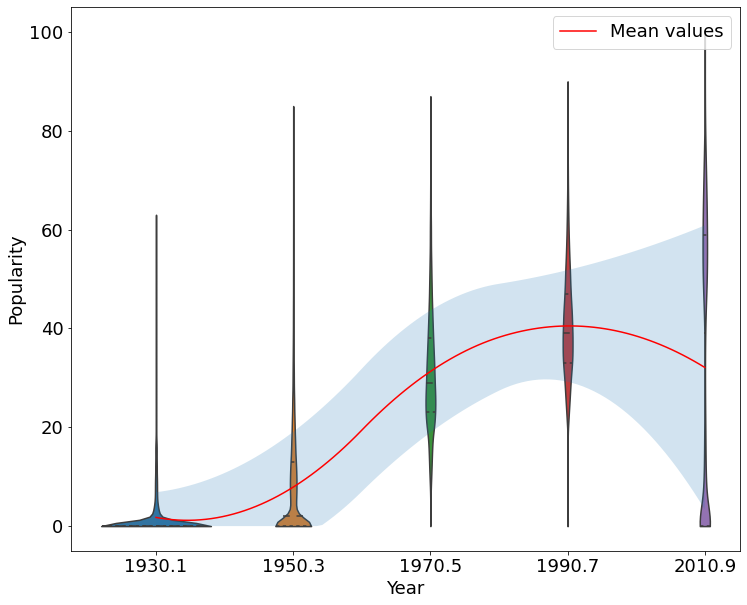

In [179]:
from matplotlib.ticker import FormatStrFormatter
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
sns.violinplot(data=counts, ax=ax, inner='quartile', cut=0)
ax.set_xticklabels(np.round(conditions, 2))

x = range(len(counts))
xnew= np.linspace(0, len(counts)-1, 100)
means_s = interp1d(x, means, kind='quadratic')
means_p_std = interp1d(x, means+stds, kind='quadratic')
means_m_std = interp1d(x, means-stds, kind='quadratic')


ax.plot(xnew, means_s(xnew), color='r', label='Mean values')
ax.fill_between(xnew, y1=np.max([means_m_std(xnew), np.zeros_like(xnew)], axis=0), y2=means_p_std(xnew), alpha=0.2)
ax.legend()
ax.set_ylabel('Popularity')
ax.set_xlabel('Year')

plt.savefig('images/3_cond_proba_2.png', dpi=None, quality=95, transparent=False)
plt.show()

## Step 4. 
You need to make an estimation of pair correlation coefficients, confidence intervals for them and significance levels.

In [5]:
cut_df = df[df['popularity'] != 0]
cut_y = df[df['popularity'] != 0].popularity

In [14]:
#Calculate correlations between all columns

corr = df[['popularity']+cont_cols].corr()

D:\Programs\Anaconda\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later
  This is separate from the ipykernel package so we can avoid doing imports until


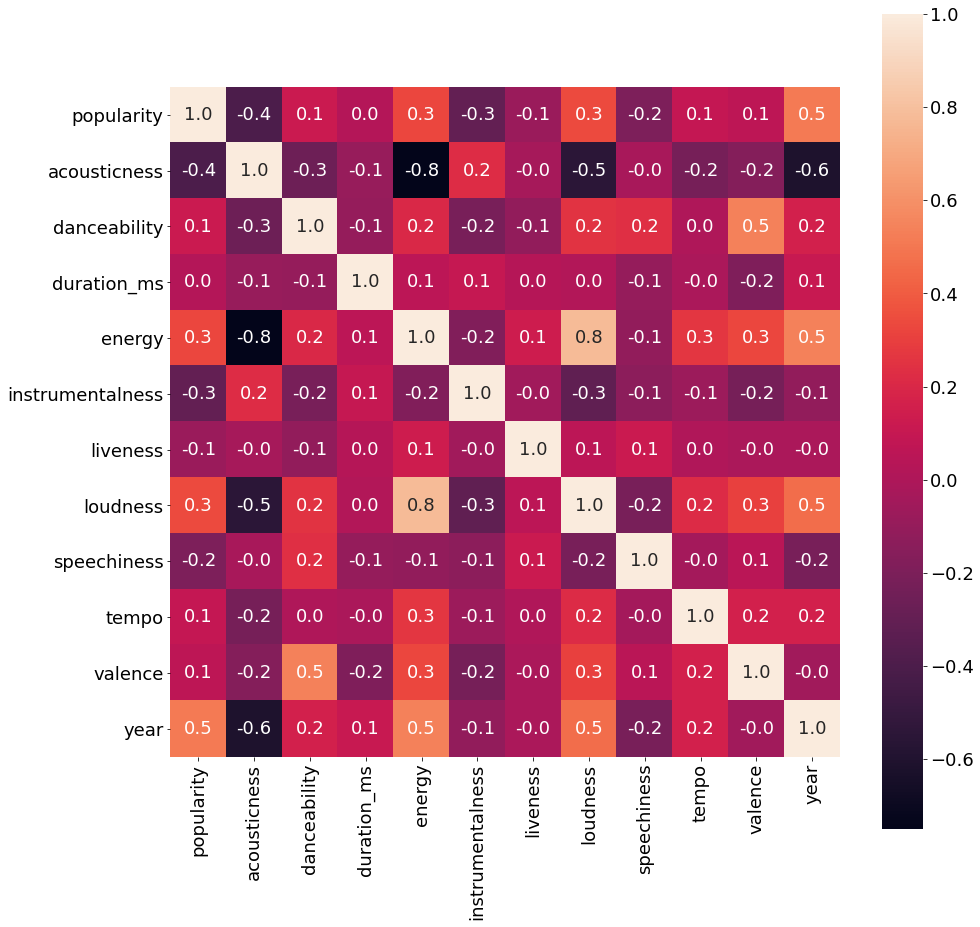

In [15]:
plt.figure(figsize=(15, 15))
sns.heatmap(corr, fmt= '.1f', annot=True, square=True)
plt.savefig('images/4_corr_matrix_big.png', dpi=None, quality=95, transparent=False)

plt.show()

In [10]:
#Брал отсюда: https://zhiyzuo.github.io/Pearson-Correlation-CI-in-Python/

def pearsonr_ci(x,y,alpha=0.05):
    ''' calculate Pearson correlation along with the confidence interval using scipy and numpy
    Parameters
    ----------
    x, y : iterable object such as a list or np.array
      Input for correlation calculation
    alpha : float
      Significance level. 0.05 by default
    Returns
    -------
    r : float
      Pearson's correlation coefficient
    pval : float
      The corresponding p value
    lo, hi : float
      The lower and upper bound of confidence intervals
    '''

    r, p = stats.pearsonr(x,y)
    r_z = np.arctanh(r)
    se = 1/np.sqrt(x.size-3)
    z = stats.norm.ppf(1-alpha/2)
    lo_z, hi_z = r_z-z*se, r_z+z*se
    lo, hi = np.tanh((lo_z, hi_z))
    return r, p, lo, hi

In [15]:
# Let's calculate pearson correlation between y and each variable in X
corr_matrix = []

for col in cont_cols:
    r, p, lo, hi = pearsonr_ci(cut_df[col], cut_y) 
    corr_matrix.append([r, f"({lo:.2f}, {hi:.2f})", p])
                       
corr_df = pd.DataFrame(data=corr_matrix, index=cont_cols, columns = ['correlation coefficient', '95% conf interval',  'p-value'])
corr_df.sort_values('correlation coefficient', ascending=False)

,correlation coefficient,95% conf interval,p-value
year,0.546610,"(0.54, 0.55)",0.000000e+00
loudness,0.321646,"(0.32, 0.33)",0.000000e+00
energy,0.278501,"(0.27, 0.28)",0.000000e+00
danceability,0.180941,"(0.18, 0.19)",0.000000e+00
tempo,0.062135,"(0.06, 0.07)",2.642671e-114
duration_ms,0.042151,"(0.04, 0.05)",1.472046e-53
valence,0.038928,"(0.03, 0.04)",6.175096e-46
speechiness,-0.054888,"(-0.06, -0.05)",1.391916e-89
liveness,-0.092912,"(-0.10, -0.09)",1.167334e-253
instrumentalness,-0.238290,"(-0.24, -0.23)",0.000000e+00


In [4]:
#pred_cols = ['year', 'acousticness',  'loudness', 'energy', 'danceability']
pred_cols = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'loudness',\
             'speechiness','year']

In [7]:
X=df[pred_cols]
ipca = IncrementalPCA(n_components=7, batch_size=20)
ipca.fit(X)
X=ipca.transform(X) 

<AxesSubplot:>

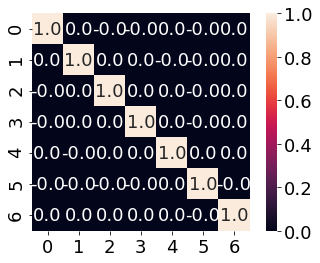

In [8]:
corr_pca = pd.DataFrame(X).corr()
sns.heatmap(corr_pca, fmt= '.1f', annot=True, square=True)


## Step 5. 
Choose a task formulation for regression. Estimate multivariate correlation (target - predictors).

In [9]:
#lecture 3, slide 19
corr_2 = df[['popularity']+pred_cols].corr()
alg_compl = df[pred_cols].corr()
mult_corr = (1 - np.linalg.det(corr_2)/np.linalg.det(alg_compl))**0.5
mult_corr

0.5898946128238831

## Step 6. 
Build regression model and make an analysis of multicollinearity and regularization (if needed). 

D:\Programs\Anaconda\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later
  


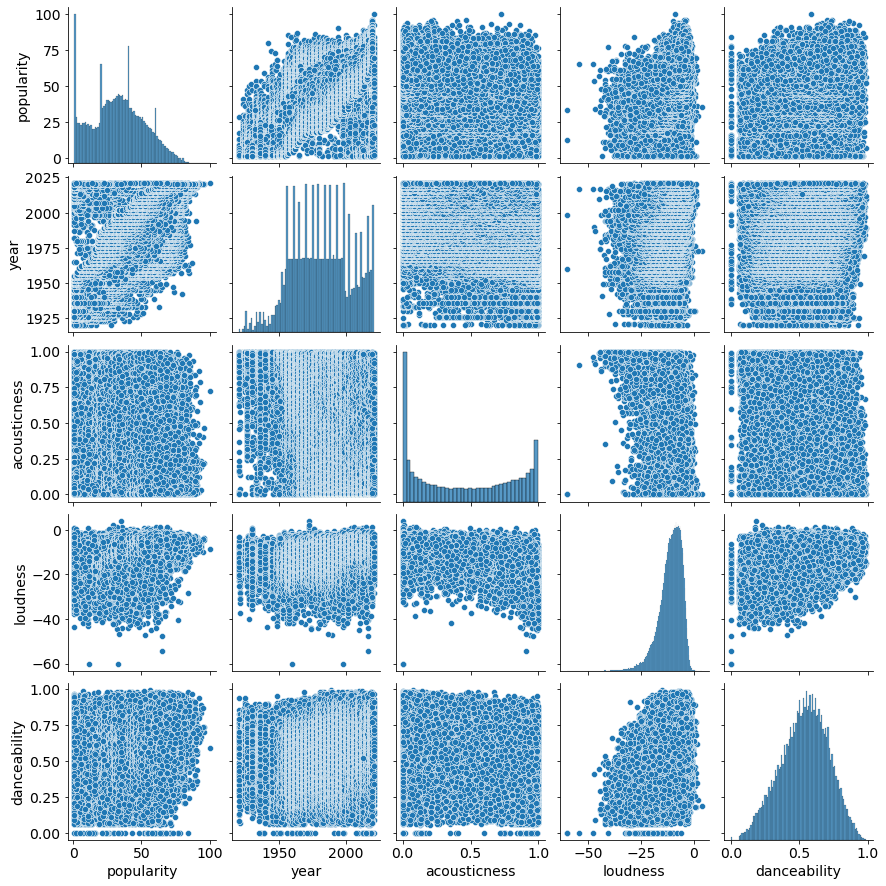

In [18]:
sns.pairplot(cut_df[['popularity']+pred_cols])
plt.savefig('images/6_pair_plot.png', dpi=None, quality=95, transparent=False)


In [12]:
from scipy import stats

def invboxcox(y,lmbda):
    if lmbda == 0:
        return(np.exp(y))
    else:
        return(np.exp(np.log(lmbda*y+1)/lmbda))

In [76]:
transf_y, lmbda = stats.boxcox(cut_df.popularity)

(array([12830.,  9663., 14443., 22315., 26738., 20595., 16991.,  8093.,
         1712.,   104.]),
 array([ 0.        ,  3.70169841,  7.40339683, 11.10509524, 14.80679366,
        18.50849207, 22.21019049, 25.9118889 , 29.61358731, 33.31528573,
        37.01698414]),
 <BarContainer object of 10 artists>)

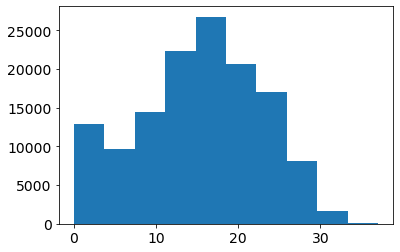

In [14]:
plt.hist(transf_y)

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Lasso


In [ ]:
#reg = LinearRegression(normalize=True)
#reg = Lasso(alpha = 0.1, normalize=True)
#reg = RandomForestRegressor()
#model = make_pipeline(PolynomialFeatures(include_bias=False), Ridge())

'''
grid = {
    'ridge__alpha': [0.0001],
    'ridge__normalize': [True, False],
    'polynomialfeatures__degree': [8]
}

reg = GridSearchCV(model, grid, cv=5, n_jobs=3)
reg.fit(X_train, y_train)
'''

In [ ]:
#X = cut_df[pred_cols]
X = df[pred_cols]
X = PolynomialFeatures(degree= 5, include_bias=False).fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)

In [54]:
reg = Lasso(alpha=0.0001, normalize=True)

In [57]:
X=df[pred_cols]
ipca = IncrementalPCA(n_components=6, batch_size=100)
ipca.fit(X)
X=ipca.transform(X)
poly = PolynomialFeatures(8, include_bias=False)
X=poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=46)
reg=LinearRegression(normalize=True)

In [58]:
reg.fit(X_train, y_train)

LinearRegression(normalize=True)

In [59]:
#y_pred = invboxcox(np.clip(reg.predict(X_test), a_min=min(transf_y), a_max=None), lmbda)
#y_pred_all = invboxcox(np.clip(reg.predict(X), a_min=min(transf_y), a_max=max(transf_y)), lmbda)

y_pred = np.clip(reg.predict(X_test), a_min=0, a_max=100)
y_pred_all = np.clip(reg.predict(X), a_min=0, a_max=100)

In [60]:
# Calculation of model metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print('Mean absolute error = ', mae)
print('Mean squared error = ', mse)

Mean absolute error =  9.394232679659636
Mean squared error =  192.39311156227154


D:\Programs\Anaconda\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later
  import sys


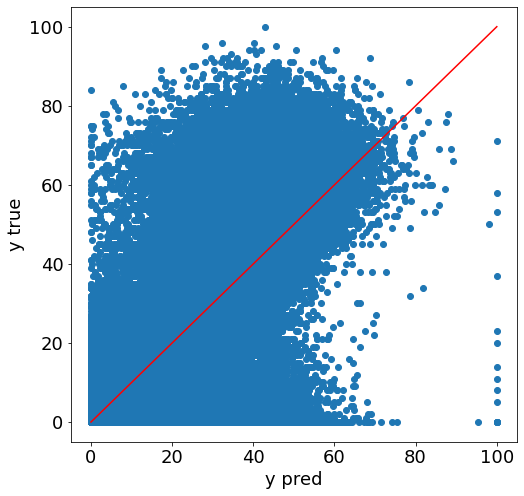

In [62]:
plt.figure(figsize=(8, 8))
plt.scatter(y_pred_all, y)
plt.xticks(range(0, 101, 20))
plt.xlabel('y pred')
plt.ylabel('y true')
plt.plot([0, 100], [0, 100], color='r')
plt.savefig('images/6_predictions.png', dpi=None, quality=95, transparent=False)
plt.show()

## Step 7. 
Analyze the quality of regression model (distribution of residuals, determination coefficient).

In [65]:
from scipy.stats import norm

In [22]:
res = stats.linregress(y_test, y_pred)
print(f"R-squared: {res.rvalue**2:.6f}")

R-squared: 0.599000


In [88]:
residuals = pd.Series(y_pred-y_test)
norm_params = norm.fit(residuals)

In [89]:
norm_params

(0.18899139412159888, 13.869296803198766)

In [120]:
residuals.mean(), residuals.std()

(0.18899139412159285, 13.869495633336111)

D:\Programs\Anaconda\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later
  import sys


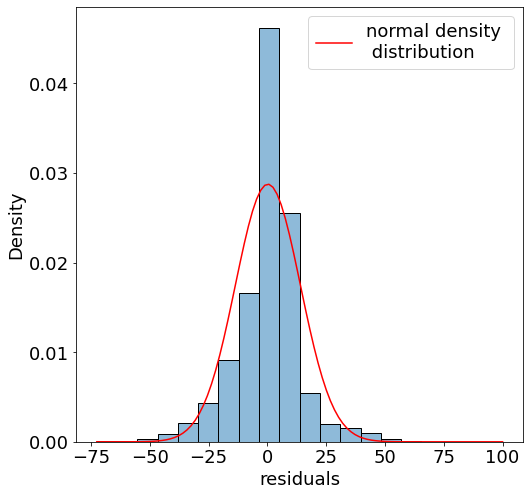

In [125]:
fig, ax = plt.subplots(1, figsize=(8, 8))
sns.histplot(residuals, bins=20, ax=ax, alpha=0.5, stat='density')
x_r = np.linspace(min(residuals), max(residuals), 100)
ax.plot(x_r, norm.pdf(x_r, *norm_params), c='r', label=f'normal density \n distribution')
ax.set_xlabel('residuals')
plt.legend()
plt.savefig('images/7_residuals.png', dpi=None, quality=95, transparent=False)
plt.show()

In [104]:
def ks_test(data, distribution, params, alpha = 0.05, N = 50):
    ks = stats.kstest(data.sample(N), distribution, params, N)
    if ks[1] > alpha:
        print(f'Kolmogorov test passed. Under the null hypothesis,\n the two {distribution} distributions are identical')
    else:
        print(f"Kolmogorov test failed. Hypothesis about {distribution} is false")
    print('\n',ks)
def cvm_test(data, distribution, params, alpha = 0.05, N=50):
    cvm = stats.cramervonmises(data.sample(N), distribution, params)
    if cvm.pvalue > alpha: 
        print(f"Cramer-von-Mises test passed. Hypothesis about that distribution \n have cumulative {distribution} distribution is true")
    else:
        print(f"Cramer-von-Mises failed. We reject the null hypothesis \n that the observed sample is drawn from a {distribution} distribution")
    print('\n',cvm)

def statistical_tests(data, distribution, params, alpha = 0.05, N = 50):
    ks_test(data, distribution, params, alpha, N)
    print('\n')
    cvm_test(data, distribution, params, alpha, N)

In [118]:
statistical_tests(residuals, 'norm', norm_params, N=200)

Kolmogorov test failed. Hypothesis about norm is false

 KstestResult(statistic=0.12464860031938435, pvalue=0.003625030083692142)


Cramer-von-Mises test passed. Hypothesis about that distribution 
 have cumulative norm distribution is true

 CramerVonMisesResult(statistic=0.33704910758012324, pvalue=0.10659654454172529)
